In [1]:
from lab import Vanila
from lab import train
from lab import Loss

In [2]:
import numpy as np
from PIL import Image
from tqdm.auto import tqdm
import random

C:\Users\panah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = Vanila()
model.set_init_method("xavier")

In [4]:
model.add_vanila(number_of_neurons=784)
model.add_vanila(number_of_neurons=640)
model.add_vanila(number_of_neurons=640)
model.add_vanila(number_of_neurons=10)


In [5]:
model.set_activation(activation='relu')

In [68]:
image = Image.open(f'archive/dataset/{1}/{1}/{0}.png')
# image = Image.open(f'archive/dataset/{1}/{1}/{0}.png').convert('L')
image = np.array(image)
image = image[:,:,3]
# image = image.flatten()
# image = image.reshape(1,784)
np.shape(image)
# image.show()

(28, 28)

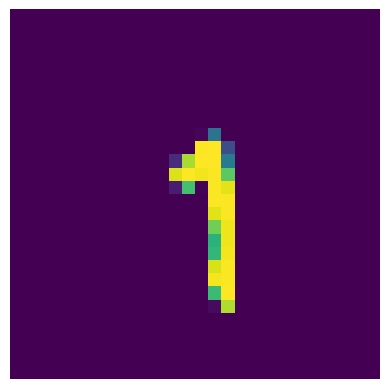

In [69]:

import matplotlib.pyplot as plt

plt.imshow(image)  # Use cmap="gray" for grayscale images
plt.axis("off")  # Hide axes
plt.show()


In [7]:
for f1 in tqdm(range(5000)):
    r = random.randint(0,9)
    image = Image.open(f'archive/dataset/{r}/{r}/{f1}.png').convert('L')
    image = np.array(image)
    image = image.flatten()
    image = image.reshape(1,784)
    x = model.forward(image)
    y_true = np.zeros((1,10))
    y_true[0][r] = 1
    loss = Loss.CCE(y_pred=x, y_true=y_true)        
    train.backpropagation(model = model, y_pred=x, y=y_true,X=image, lr=0.01)
    if f1%200==0:      
        print(loss)

  0%|          | 1/5000 [00:00<02:59, 27.81it/s]


2.3025850929940455


ValueError: operands could not be broadcast together with shapes (640,10) (10,1) 

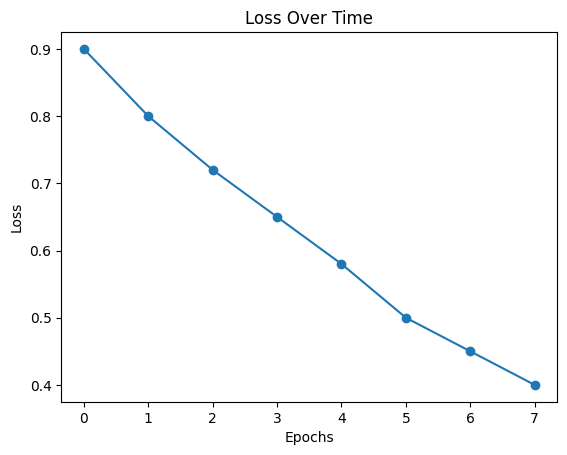

In [8]:
import matplotlib.pyplot as plt

# Example: List of loss values per epoch
losses = [0.9, 0.8, 0.72, 0.65, 0.58, 0.50, 0.45, 0.40]  # Replace with your actual loss values

# Create a plot
plt.plot(losses, marker='o', linestyle='-')

# Add labels and title
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Time")

# Show the plot
plt.show()
